# **Clustering Stocks using K-Means**

In [12]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [13]:
# define instruments to download
companies_dict = {
 'ICICIBANK': 'ICICIBANK.NS',
 'SBI': 'SBIN.NS',
 'HDFCBANK': 'HDFCBANK.NS',
 'GAIL': 'GAIL.NS',
 'INFOSYS': 'INFY.NS',
 'RELIANCE':'RELIANCE.NS',
 'HCL': 'HCLTECH.NS',
 'SAIL': 'SAIL.NS',
 'NTPC': 'NTPC.NS',
 'ONGC': 'ONGC.NS',
 'IOC': 'IOC.NS',
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [14]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2018-01-01'
end_date = '2019-12-31'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', name='Date', length=489, freq=None), MultiIndex([('Adj Close', 'ICICIBANK.NS'),
            ('Adj Close',      'SBIN.NS'),
            ('Adj Close',  'HDFCBANK.NS'),
            ('Adj Close',      'GAIL.NS'),
            ('Adj Close',      'INFY.NS'),
            ('Adj Close',  'RELIANCE.NS'),
            ('Adj Close',   'HCLTECH.NS'),
            ('Adj Close',      'SAIL.NS'),
            ('Adj Close',      'NTPC.NS'),
            ('Adj Close',      'ONGC.NS'),
            ('Adj Close',       'IOC.NS'),
            (    'Close', 'ICICIBANK.NS'),
            (    '

In [15]:
# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
ICICIBANK.NS    310.299988
SBIN.NS         307.100006
HDFCBANK.NS     927.250000
GAIL.NS         186.993790
INFY.NS         516.775024
RELIANCE.NS     901.207458
HCLTECH.NS      439.350006
SAIL.NS          92.699997
NTPC.NS         147.125000
ONGC.NS         192.350006
IOC.NS          194.975006
Name: 2018-01-01 00:00:00, dtype: float64


In [16]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

# Getting Sum of Movemnets

In [17]:
for i in range(0, len(companies)):
 print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))


Company: GAIL, Change: 93.24993896484375
Company: HCL, Change: -200.55056762695312
Company: HDFCBANK, Change: -198.57464599609375
Company: ICICIBANK, Change: -191.3251495361328
Company: INFOSYS, Change: 12.923828125
Company: IOC, Change: -314.47021484375
Company: NTPC, Change: -183.44976806640625
Company: ONGC, Change: -99.6500244140625
Company: RELIANCE, Change: -72.024658203125
Company: SAIL, Change: -204.65003967285156
Company: SBI, Change: -187.1249008178711


# DATA EXPLORATION

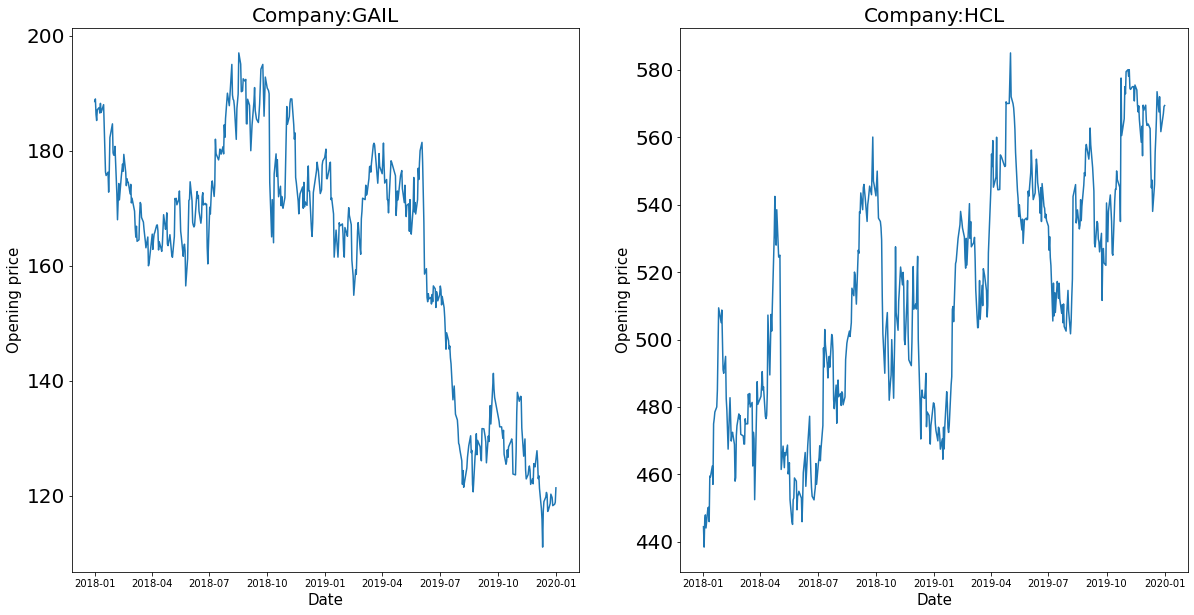

In [18]:
plt.figure(figsize = (20,10)) 
plt.subplot(1,2,1) 
plt.title("Company:GAIL",fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 15)
plt.ylabel("Opening price",fontsize = 15)
plt.plot(panel_data["Open"]["GAIL.NS"])
plt.subplot(1,2,2) 
plt.title("Company:HCL",fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 15)
plt.ylabel("Opening price",fontsize = 15)
plt.plot(panel_data["Open"]["HCLTECH.NS"])

PLOTTING PRICES

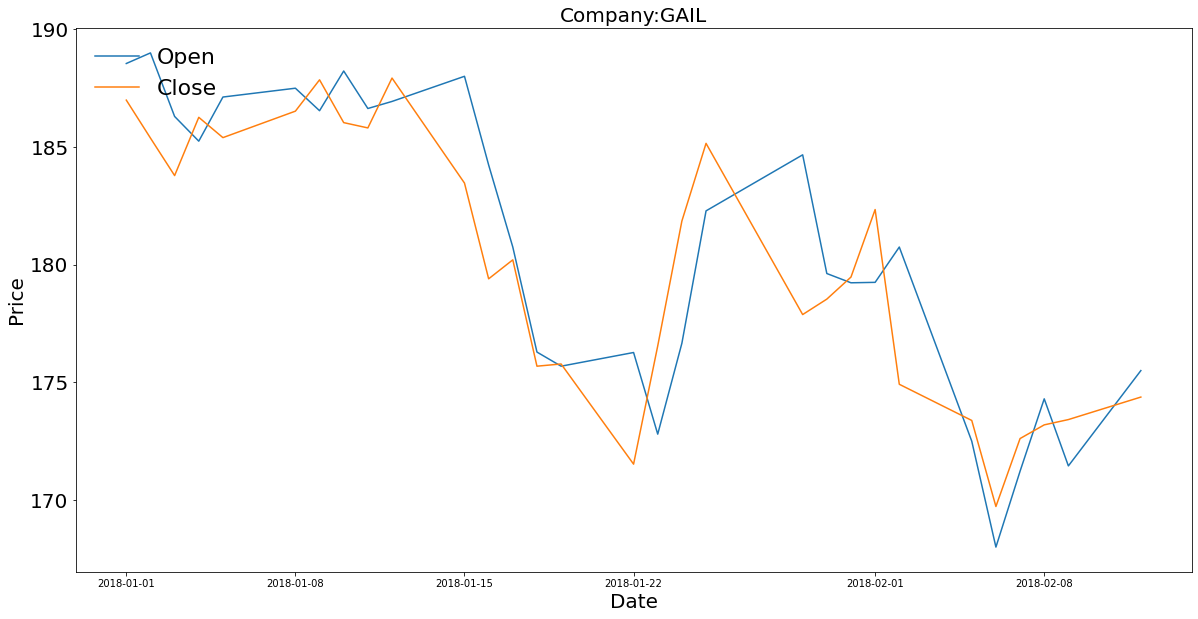

In [19]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title("Company:GAIL",fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Price",fontsize = 20)
plt.plot(panel_data.iloc[0:30]["Open"]["GAIL.NS"],label = "Open") # Opening prices of first 30 days are plotted against date
plt.plot(panel_data.iloc[0:30]["Close"]["GAIL.NS"],label = "Close") # Closing prices of first 30 days are plotted against date
plt.legend(loc="upper left", frameon=False,framealpha=1,prop={"size": 22}) # Properties of legend box

MOVEMENT IS GOING DOWN FOR THIS STOCK

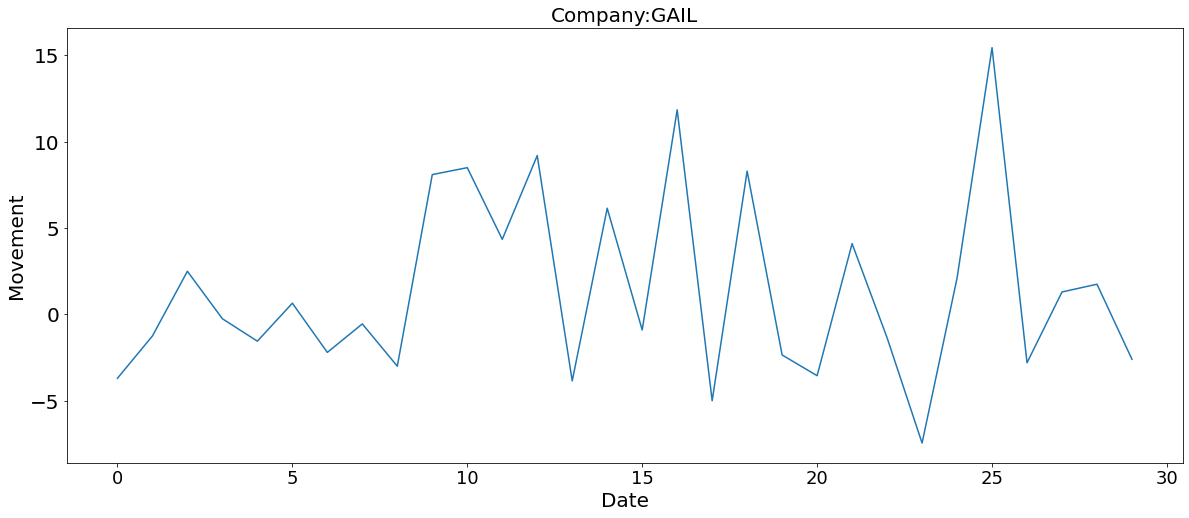

In [20]:
plt.figure(figsize = (20,8)) 
plt.title("Company:GAIL",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Movement",fontsize = 20)
plt.plot(movements[0][0:30])

DATA NEEDS NORMALISATION BEFORE CLUSTERING

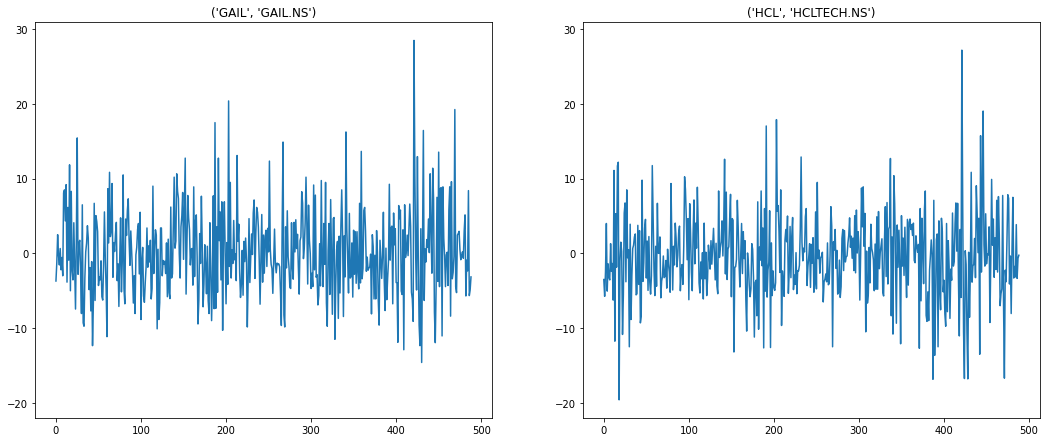

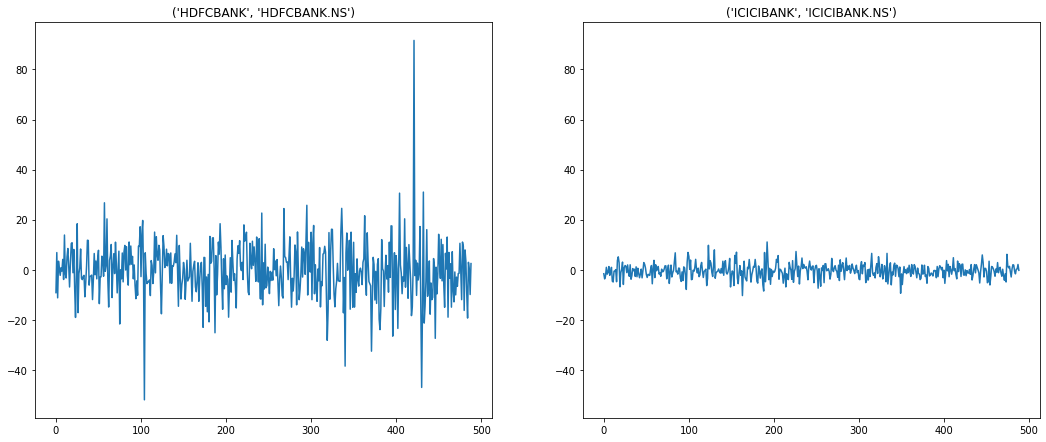

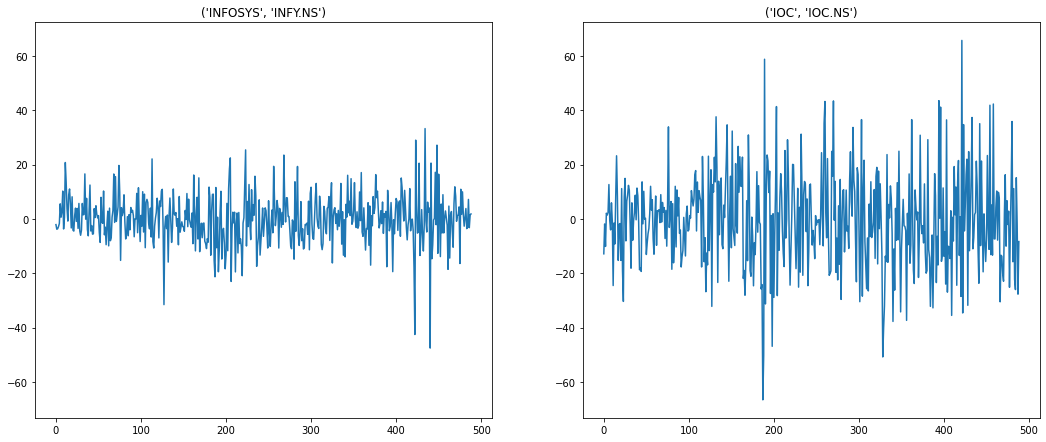

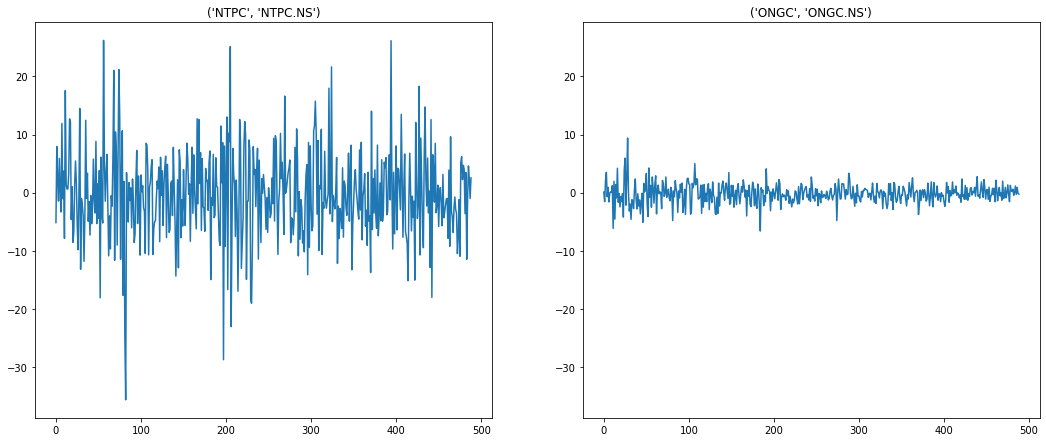

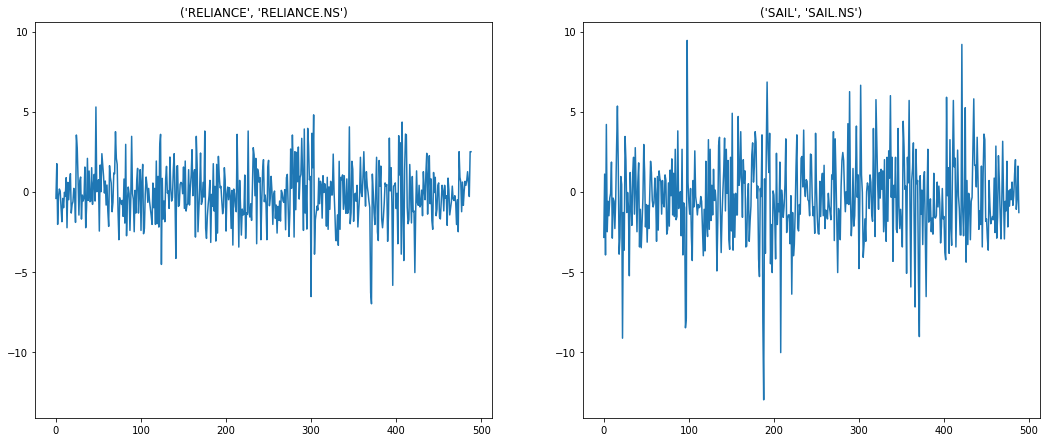

Text(0.5, 1.0, "('SBI', 'SBIN.NS')")

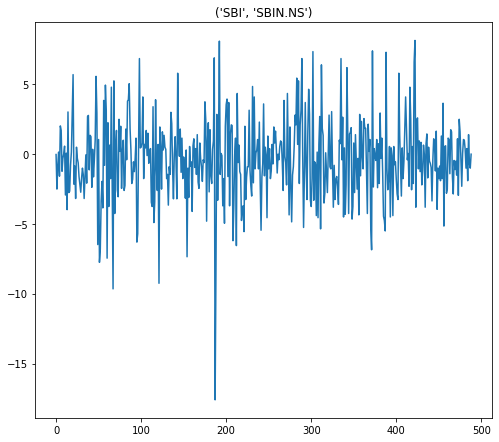

In [21]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

plt.figure(figsize=(18,16))
ax2 = plt.subplot(221)
plt.plot(movements[2][:])
plt.title(companies[2])

plt.subplot(222, sharey=ax2)
plt.plot(movements[3][:])
plt.title(companies[3])
plt.show()

plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[4][:])
plt.title(companies[4])

plt.subplot(222, sharey=ax1)
plt.plot(movements[5][:])
plt.title(companies[5])
plt.show()

plt.figure(figsize=(18,16))
ax2 = plt.subplot(221)
plt.plot(movements[6][:])
plt.title(companies[6])

plt.subplot(222, sharey=ax2)
plt.plot(movements[7][:])
plt.title(companies[7])
plt.show()

plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[8][:])
plt.title(companies[8])

plt.subplot(222, sharey=ax1)
plt.plot(movements[9][:])
plt.title(companies[9])
plt.show()

plt.figure(figsize=(18,16))
ax2 = plt.subplot(221)
plt.plot(movements[10][:])
plt.title(companies[10])

In [ ]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.36827398825708774
-0.27111840295637823
-0.003217714841787021


K-Means Clustering

In [ ]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 5 clusters
kmeans = KMeans(n_clusters=5, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [ ]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=5, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                  companies
0        0            (GAIL, GAIL.NS)
1        0          (HCL, HCLTECH.NS)
7        0            (ONGC, ONGC.NS)
3        1  (ICICIBANK, ICICIBANK.NS)
8        1    (RELIANCE, RELIANCE.NS)
9        1            (SAIL, SAIL.NS)
10       1             (SBI, SBIN.NS)
4        2         (INFOSYS, INFY.NS)
6        2            (NTPC, NTPC.NS)
2        3    (HDFCBANK, HDFCBANK.NS)
5        4              (IOC, IOC.NS)


BANKS USUALLY HAVE SAME MOVEMENTS, SO WE EXPECT THEM TO BELONG TO SIMILAR CLUSTERS.

WE SEE ONLY HDFCBANK WHICH DOES NOT BELONG TO A SIMILAR CLUSTER.

FURTHER EXPLORATION IS REQUIRED